In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Syntons_5567.csv', on_bad_lines='skip')

# Ensure the SMILES column exists
if 'SMILES' not in df.columns:
    raise ValueError("CSV file must have a column named 'SMILES'.")

# Display the first few rows
print(df.head())


                                SMILES  synton_id synton_role reaction_id
0  O=C(c1ccccc1C(F)(F)F)N1CCCN([U])CC1     236434    synton_1          a2
1                  [U]c1ncc2c(n1)CCCC2     250139    synton_2          a2
2                 CNC(=O)c1ccnc([U])c1      19571    synton_2          a2
3               CC(C)Oc1cc([U])nc(N)n1     403991    synton_2          a2
4    O=C(OCC1CC1)c1cnc([U])nc1C(F)(F)F     317239    synton_2          a2


In [6]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Convert SMILES to RDKit Mol objects
df['Mol'] = df['SMILES'].apply(Chem.MolFromSmiles)

# Compute Morgan fingerprints (radius 2)
df['Fingerprint'] = df['Mol'].apply(lambda mol: AllChem.GetMorganFingerprintAsBitVect(mol, radius=2))



In [7]:
from rdkit.DataStructs import TanimotoSimilarity
import numpy as np

# Initialize a similarity matrix
n = len(df)
similarity_matrix = np.zeros((n, n))

# Compute Tanimoto similarity for each pair
for i in range(n):
    for j in range(n):
        similarity_matrix[i, j] = TanimotoSimilarity(df['Fingerprint'][i], df['Fingerprint'][j])


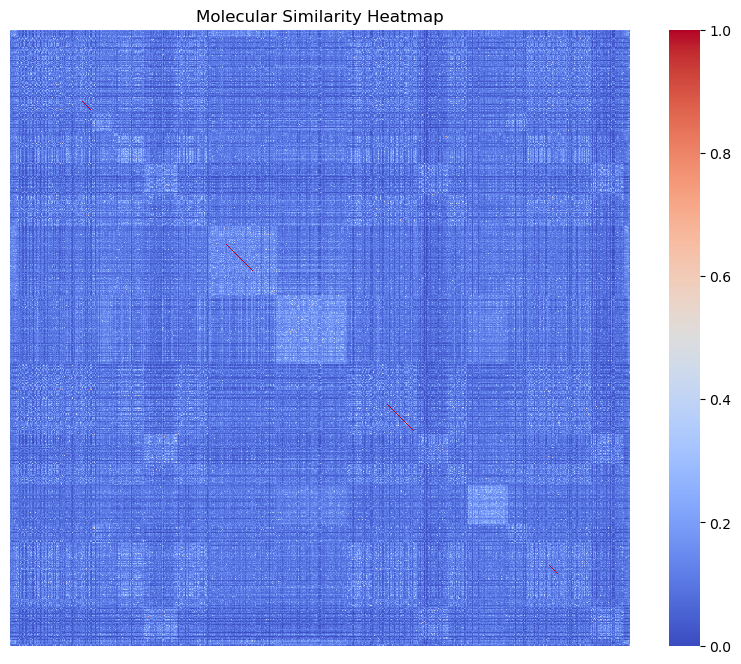

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title("Molecular Similarity Heatmap")
plt.show()


In [17]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# Load the CSV file containing SMILES
df = pd.read_csv('Syntons_5567.csv')

# Ensure the SMILES column exists
if 'SMILES' not in df.columns:
    raise ValueError("CSV file must have a column named 'SMILES'.")

# Function to calculate molecular complexity (as a rough approximation for SAScore)
def calculate_sascore(mol):
    if mol is None:
        return None
    # Descriptors
    mol_weight = Descriptors.MolWt(mol)
    num_rotatable_bonds = Descriptors.NumRotatableBonds(mol)
    num_rings = Descriptors.RingCount(mol)
    
    # Simpler synthetic accessibility score (in this case, a custom score formula)
    sascore = (mol_weight + num_rotatable_bonds + num_rings) / 3.0  # This is a simplistic formula
    return sascore

# Convert SMILES to RDKit molecules and calculate the SAScore
df['Mol'] = df['SMILES'].apply(Chem.MolFromSmiles)
df['Synthetic Accessibility Score'] = df['Mol'].apply(calculate_sascore)

# You can also calculate other descriptors for display if needed
df['Molecular Weight'] = df['Mol'].apply(Descriptors.MolWt)
df['Rotatable Bonds'] = df['Mol'].apply(Descriptors.NumRotatableBonds)
df['Ring Count'] = df['Mol'].apply(Descriptors.RingCount)

# Display the first few rows to check the results
print(df[['SMILES', 'Molecular Weight', 'Rotatable Bonds', 'Ring Count', 'Synthetic Accessibility Score']].head())



                                SMILES  Molecular Weight  Rotatable Bonds   
0  O=C(c1ccccc1C(F)(F)F)N1CCCN([U])CC1           509.291                1  \
1                  [U]c1ncc2c(n1)CCCC2           371.203                0   
2                 CNC(=O)c1ccnc([U])c1           373.175                1   
3               CC(C)Oc1cc([U])nc(N)n1           390.206                2   
4    O=C(OCC1CC1)c1cnc([U])nc1C(F)(F)F           483.209                3   

   Ring Count  Synthetic Accessibility Score  
0           2                     170.763667  
1           2                     124.401000  
2           1                     125.058333  
3           1                     131.068667  
4           2                     162.736333  


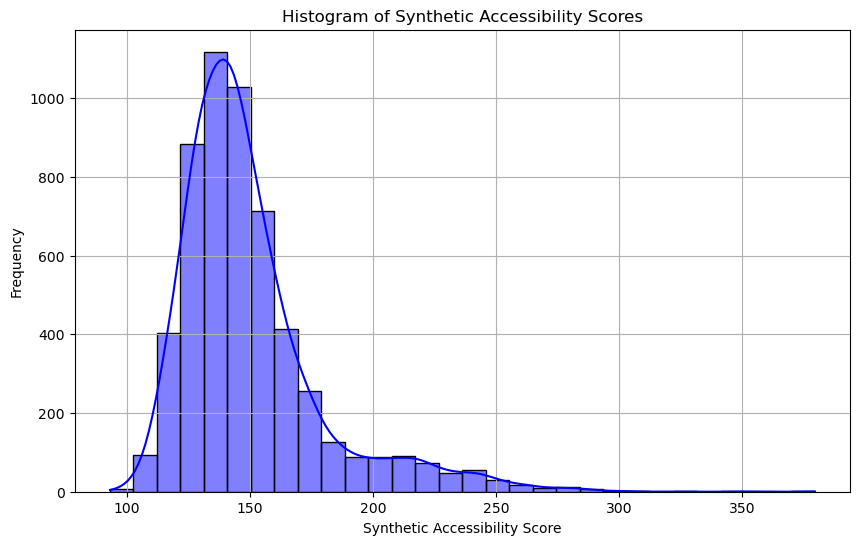

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of Synthetic Accessibility Scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Synthetic Accessibility Score'].dropna(), kde=True, color='blue', bins=30)
plt.title('Histogram of Synthetic Accessibility Scores')
plt.xlabel('Synthetic Accessibility Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



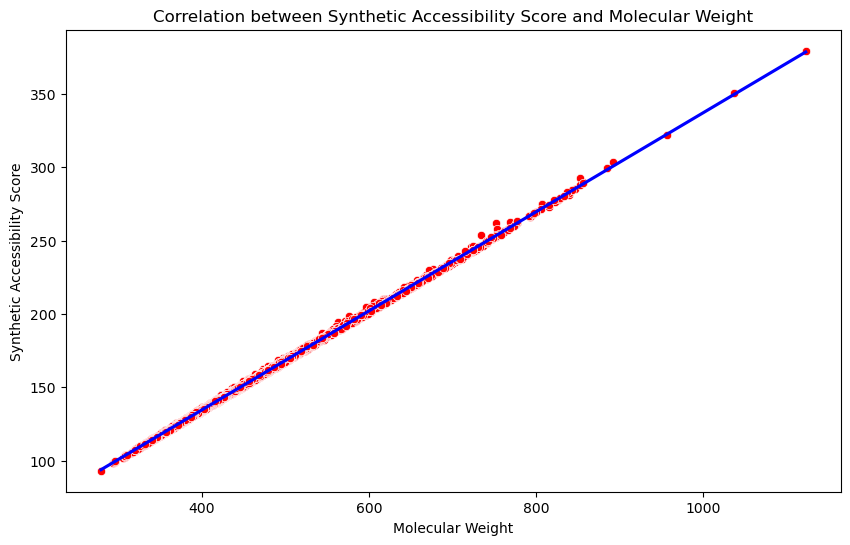

In [20]:
# Compute Molecular Weight
from rdkit.Chem.Descriptors import MolWt
df['MolWeight'] = df['Mol'].apply(MolWt)

import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Molecular Weight', y='Synthetic Accessibility Score', data=df, color='red')

# Add a regression line to visualize the trend
sns.regplot(x='Molecular Weight', y='Synthetic Accessibility Score', data=df, scatter=False, color='blue')

# Add title and labels
plt.title('Correlation between Synthetic Accessibility Score and Molecular Weight')
plt.xlabel('Molecular Weight')
plt.ylabel('Synthetic Accessibility Score')

# Display the plot
plt.show()


In [23]:
# Define the calculate_logp function
def calculate_logp(mol):
    if mol is None:
        return None
    return Descriptors.MolLogP(mol)

# Calculate logP for each molecule using the existing Mol column
df['logP'] = df['Mol'].apply(calculate_logp)

# Display the first few rows
print(df[['SMILES', 'logP']])


                                          SMILES    logP
0            O=C(c1ccccc1C(F)(F)F)N1CCCN([U])CC1  2.3176
1                            [U]c1ncc2c(n1)CCCC2  0.5300
2                           CNC(=O)c1ccnc([U])c1 -0.3842
3                         CC(C)Oc1cc([U])nc(N)n1  0.0206
4              O=C(OCC1CC1)c1cnc([U])nc1C(F)(F)F  1.2368
...                                          ...     ...
5562              O=C([Np])c1ccc2c(c1)CN([U])CC2  1.1985
5563             O=C([Np])c1ccc(OC2CN([U])C2)cc1  0.9034
5564                 O=C([Np])c1ccc2c(c1)CCN2[U]  1.2029
5565                      O=C([Np])CCC1CCCCN1[U]  1.1613
5566  CC(C)(C)O[C@@H]1C[C@@H](C(=O)[Np])N([U])C1  0.7846

[5567 rows x 2 columns]


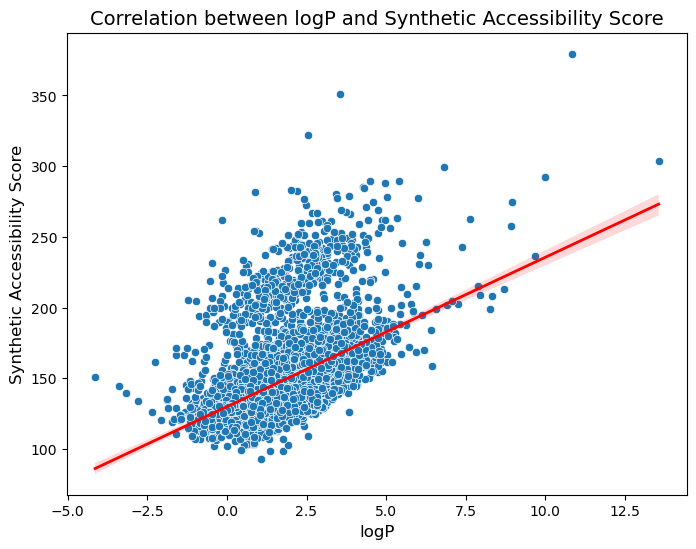

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'logP' and 'Synthetic Accessibility Score' columns exist
if 'logP' in df.columns and 'Synthetic Accessibility Score' in df.columns:
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='logP', y='Synthetic Accessibility Score', data=df)
    
    # Add a line of best fit (optional)
    sns.regplot(x='logP', y='Synthetic Accessibility Score', data=df, scatter=False, color='r', line_kws={'linewidth': 2})
    
    # Set labels and title
    plt.title("Correlation between logP and Synthetic Accessibility Score", fontsize=14)
    plt.xlabel("logP", fontsize=12)
    plt.ylabel("Synthetic Accessibility Score", fontsize=12)
    
    # Display the plot
    plt.show()
else:
    print("Columns 'logP' and 'Synthetic Accessibility Score' not found.")
